In [1]:
# Imports
import math
from IPython.display import display, Math, Latex

from scipy.stats import norm, f, t
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def mean(data):
    return sum(data) / len(data)

def sample_variance(data):
    sigma = mean(data)
    
    sum_diffs = 0
    for element in data:
        sum_diffs += (element - sigma)**2
    variance = (1 / (len(data) - 1)) * sum_diffs
    return variance

def sample_deviation(data):
    variance = sample_variance(data)
    return math.sqrt(variance)

def population_variance(data):
    sigma = mean(data)
    
    sum_diffs = 0
    for element in data:
        sum_diffs += (element - sigma)**2
    variance = (1 / (len(data))) * sum_diffs
    return variance

def population_deviation(data):
    variance = population_variance(data)
    return math.sqrt(variance)

### Binomial Distribution

##### Binomial Probability Distribution
    
$P(x) = \frac{n!}{x!(n - x)!}p^x(1 - p)^{n-x}$

In [3]:
def binom_prob_distribution(x, n, p):
    """
    The probability of x successes in a binomial experiment 
    with n trials and a probabilty of success of p
    
    Args:
        x : Number of successes to calculate probability for 
        n : Number of trials to conduct
        p : Probabilty of a successful result
    """
    display(Math(f'x = {x}'))
    display(Math(f'n = {n}'))
    display(Math(f'p = {p}'))
    display(Math(r'P(x) = \frac{n!}{x!(n - x)!}p^x(1 - p)^{n-x}'))
    display(Math(
        f'P(x) = \\frac{{ {n}! }}{{ {x}!({n} - {x})!}} {p}^{x}(1 - {p})^{{{n}-{x}}}'
    ))
    # calculate factorials
    f_n = math.factorial(n)
    f_x = math.factorial(x)
    f_nx = math.factorial(n - x)
    
    # Calculate probabilty elements
    p_by_trials = p**x
    p_failure = 1 - p
    no_failure = n - x
    display(Math(
        f'P(x) = \\frac{{ {f_n:g} }}{{ {f_x:g} \\cdot {f_nx:g} }}{p_by_trials:g}({p_failure:g})^{no_failure:g}'
    ))
    
    coefficient = f_n / (f_x * f_nx)
    probabilty = p_by_trials * (p_failure**no_failure)
    display(Math(f'P(x) = {coefficient:g} \\cdot {probabilty:g}'))
    result = coefficient * probabilty
    display(Math(f'P(x) = {result:g}'))
    return result
    

In [4]:
result = binom_prob_distribution(2, 10, .2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Binomial Mean Variance and Standard Deviation

##### mean
$ \mu = np $
##### Variance
$ \sigma^2 = np(1 - p) $
##### Standard Deviation
$ \sigma = \sqrt{np(1 - p)} $

In [5]:
def binom_mean(n, p):
    """
    Binomial Mean
    
    Args:
        n : Number of trials
        p : probabilty of a success
    """
    display(Math(r'\mu = np'))
    display(Math(f'\\mu = {n} \\cdot {p}'))
    result = n * p
    display(Math(f'\\mu = {result}'))
    return result

def binom_std_deviation(n, p):
    """
    Binomial Mean
    
    Args:
        n : Number of trials
        p : probabilty of a success
    """
    display(Math(r'\sigma = \sqrt{np(1 - p)}'))
    display(Math(f'\\sigma = \sqrt{{{n} \\cdot {p} \\cdot (1 - {p})  }}'))
    variance = n * p * (1 - p)
    display(Math(f'\\sigma = \sqrt{{{variance:g}}}'))
    result = math.sqrt(variance)
    display(Math(f'\\sigma = {result:g}'))
    return result

In [6]:
result = binom_mean(10, .2)
result = binom_std_deviation(10, .2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
result = binom_prob_distribution(1, 10, 0.98)
print(f'{result}')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

5.01760000000004e-15


### Normal Distribution

#### Normal Density Function
$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $

In [8]:
def normal_density_function(x, mean, std_dev):
    """
    Binomial Mean
    
    Args:
        x : 
        mean : Average value - Centre of a normal distribution
        std_dev : Distribution of data - Widens or narrows curve
    """
    display(Math(r'f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}'))
    display(Math(f'f(x) = \\frac{{1}}{{ {std_dev} \\sqrt{{2 \\times {math.pi:5f} }}}}{math.e:.5f}^{{-\\frac{{1}}{{2}}(\\frac{{{x}-{mean}}}{{{std_dev}}})^2}}'))
    pi_squared = 2 * math.pi
    coeff = (1/2 * ((x - mean) / std_dev)**2)
    display(Math(f'f(x) = \\frac{{1}}{{ {std_dev} \\sqrt{{ {pi_squared:5f} }}}}{math.e:.5f}^{{- {coeff} }}'))
    e_coeff = math.e**-coeff
    
    std_dev_by_pi_sqr = std_dev *(math.sqrt(pi_squared))
    display(Math(f'f(x) = \\frac{{1}}{{ {std_dev_by_pi_sqr:g} }}{e_coeff:g}'))
    result = (1/ std_dev_by_pi_sqr) * e_coeff
    display(Math(f'f(x) = {result:g}'))
    return result

def normal_density_function_range(X, mean, std_dev):
    """
    Binomial Mean
    
    Args:
        x : 
        mean : Average value - Centre of a normal distribution
        std_dev : Distribution of data - Widens or narrows curve
    """
    results = []
    for x in X:
        pi_squared = 2 * math.pi
        coeff = (1/2 * ((x - mean) / std_dev)**2)
        e_coeff = math.e**-coeff
        std_dev_by_pi_sqr = std_dev *(math.sqrt(pi_squared))
        results.append((1/ std_dev_by_pi_sqr) * e_coeff)
    return results


z-score for 0.95 confidence 1.960
% for z-score 0.975


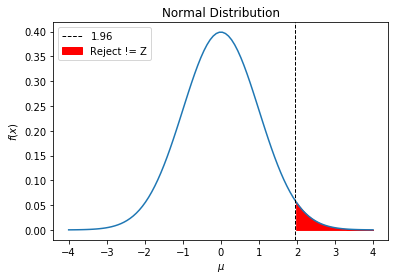

p-value 0.024997895148220373
(83.29448560287199, 94.30551439712801)
-0.42720018726587755
Is -1.960 < -0.42720018726587755 < 1.960


0.9930531492113757

In [9]:
def confidence(percent):
    # Convert a confidence percentage to a z-score
    assert 0 <= percent <= 1
    value = 1-(1-percent)/2
    z = norm.ppf(value)
    return z

def confidence_interval(percent, mean, variance, sample_size):
    lower = mean - (confidence(percent) * (variance / math.sqrt(sample_size)))
    upper = mean + (confidence(percent) * (variance / math.sqrt(sample_size)))
    return lower, upper

def cdf(x, mean=0, std_dev=1):
    z = (x - mean) / std_dev
    return (1.0 + math.erf(z / math.sqrt(2.0))) / 2.0

def cdf2(x, mean, std_dev):
    z = (x - mean) / std_dev
    return (1.0 + math.erf(z / math.sqrt(2.0))) / 2.0

def area_under_curve(a, b, mean, std_dev):
    assert b > a
    z_a = (a - mean) / std_dev
    z_b = (b - mean) / std_dev
    area_a = (1.0 + math.erf(z_a / math.sqrt(2.0))) / 2.0
    area_b = (1.0 + math.erf(z_b / math.sqrt(2.0))) / 2.0
    return area_b - area_a

def standardised_z_score(x, mu, sigma, n):
    z = (x - mu) / (sigma / math.sqrt(n))
    return z

def p_value(z, mean, std_dev, z_type='lt'):
    if z_type == 'lt':
        p = cdf(z, mean, std_dev)
    elif z_type =='gt':
        p = 1 - cdf(z, mean, std_dev)
    elif z_type == 'neq':
        cdf(z, mean, std_dev) + 1 - cdf(z, mean, std_dev)
        
    return p

def plot_normal_distribution(mu, sigma, Z=None, z_type='lt', intervals=100):
    assert z_type in ['neq', 'lt', 'gt']
    
    x = np.linspace(mu - sigma * 4, mu + sigma * 4,intervals)
    plt.title('Normal Distribution')
    plt.xlabel('$µ$')
    plt.ylabel('$f(x)$')
    plt.plot(x, normal_density_function_range(x, mu, sigma))
    
    if Z and z_type in ['lt', 'neq']:
        start = None
        end = Z
        if start == None:
            fill_x = [v for v in x if v < end]
        else:
            fill_x = [v for v in x if start < v < end]
        plt.axvline(Z, label=Z, color='k', linestyle='dashed', linewidth=1)
        plt.fill_between(fill_x, [0]*len(fill_x), normal_density_function_range(fill_x, mu, sigma), color='red')
    if Z and z_type in ['gt', 'neq']:
        end = Z
        fill_x = [v for v in x if v > end * -1]
        plt.axvline(Z * -1, label=Z * -1, color='k', linestyle='dashed', linewidth=1)
        plt.fill_between(fill_x, [0]*len(fill_x), normal_density_function_range(fill_x, mu, sigma), color='red', label='Reject != Z')
    plt.legend(loc=0)
    plt.show()


mu = 0
sigma = 1
Z = -1.96

conf = 0.95
print(f'z-score for {conf} confidence {confidence(conf):.3f}')

print('% for z-score', cdf(confidence(conf)))

plot_normal_distribution(mu, sigma, Z, z_type='gt')

print('p-value', p_value(1.96, 0, 1, 'gt'))

print(confidence_interval(.95, 88.8, 24, 73))

# H0 = 90
# H1 != 90
rejection_region = confidence(.95)
hypothesis_zero = 90
sample_mean = 88.8
variance = 24
sample_size = 73
conf = 0.95
test_z = standardised_z_score(88.8, 90, 24, 73)
print(test_z)

# Test hypothesis
print(f'Is -{rejection_region:.3f} < {test_z} < {rejection_region:.3f}')

norm.cdf(2.46)

In [10]:
x_bar = 88.8  # Sample mean
n = 73        # sample size
sigma = 24    # Standard deviation
h = 90        # hypothesis mean
a = 0.05      # significance level
conf = 1 - a  # confidence level

### Hypothesis Test
# 1) Establish hypothesis
print('Set up hypotheses')
display(Math(f'H_0 : \\mu = {h}'))
display(Math(f'H_1 : \\mu \\neq {h}'))

# 2) Calculate test statistic
print('Calculate test statistic')
test_z = standardised_z_score(x_bar, h, sigma, n)
display(Math(f'Z = \\frac{{\\bar{{X}} - \\mu_0}}{{\\frac{{\\sigma}}{{\\sqrt{{n}}}}}} = '
             f' \\frac{{ {x_bar} - {h} }}{{\\frac{{ {sigma} }}{{\\sqrt{{ {n} }}}}}} = {test_z:g}'))

#
print('Calculate rejection regions')
rejection_region_lower = -1 * confidence(conf)
rejection_region_upper = confidence(conf)

display(Math(f'{rejection_region_lower:.3f} < {test_z:g} < {rejection_region_upper:.3f}'))
print('Hypothesis test', rejection_region_lower < test_z < rejection_region_upper)
print('H0 is not rejected')


Set up hypotheses


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculate test statistic


<IPython.core.display.Math object>

Calculate rejection regions


<IPython.core.display.Math object>

Hypothesis test True
H0 is not rejected


In [11]:
result = normal_density_function(62, 50, 5)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
print(norm.cdf(-21, 0, 1), norm.cdf(1100, 1000, 100))

3.2792780189789425e-98 0.8413447460685429


In [13]:


def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0
#print(norm.cdf(1, 0, 1))
print(cdf(1.96, 0, 1))
#print(cdf(140, 150, (13.7/math.sqrt(10))))
#print(area_under_curve(-0.71, 0.92, 0, 1))


0.9750021048517796


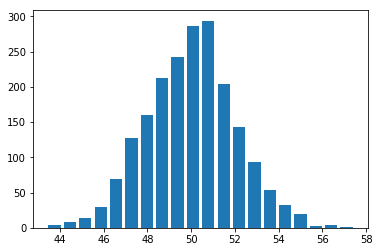

sample mean 50.00649411584613
sample variance 4.131779966052355
sample std dev 2.0326780281324326


In [14]:
import random

n = 200  # Sample observation size
m = 2000 # Samples
data = [
    [random.randrange(0, 100) + random.random() for x in range(n)] 
    for x in range(m)
]

sigmas = [mean(d) for d in data]

variances = [sample_variance(d) for d in data]

plt.hist(sigmas, 20, rwidth=0.8)
plt.show()
print('sample mean', mean(sigmas))
print('sample variance', sample_variance(sigmas))
print('sample std dev', sample_deviation(sigmas))

Checking if sample variances are equal


/home/campbell/.local/share/virtualenvs/STAT7055_-_Introduction_to_Statistics-Db-TzhsD/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


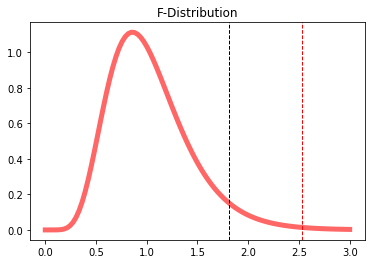

In [15]:
import numpy as np

print('Checking if sample variances are equal')

dfn, dfd = 18, 57
x = np.linspace(0,3,100)
plt.title('F-Distribution')
#plt.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label='f pdf')
plt.plot(x, f(dfn, dfd).pdf(x), 'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(1.8155, label=1.8155, color='k', linestyle='dashed', linewidth=1)
plt.axvline(2.53, label=2.53, color='r', linestyle='dashed', linewidth=1)
plt.show()

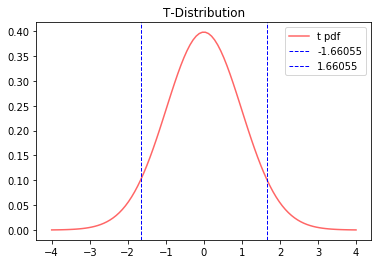

T-value 1.98157
Probabilty 0.975


In [16]:
## Setup      
dof = 98        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 1      # Number of tails 

## Calculate critical t-score
tcrit = abs(t.ppf(alpha/ntails, dof))

x = np.linspace(-4,4,100)
plt.title('T-Distribution')
plt.plot(x, t.pdf(x, dof), 'r-', alpha=0.6, label='t pdf')
plt.axvline(-tcrit, label=f'{-tcrit:g}', color='b', linestyle='dashed', linewidth=1)
plt.axvline(tcrit, label=f'{tcrit:g}', color='b', linestyle='dashed', linewidth=1)
plt.legend(loc=0)
plt.show()

# define probability
p = 0.975
df = 111
# retrieve value <= probability
value = t.ppf(p, df)
print(f'T-value {value:g}')
# confirm with cdf
p = t.cdf(value, df)
print(f'Probabilty {p:g}')

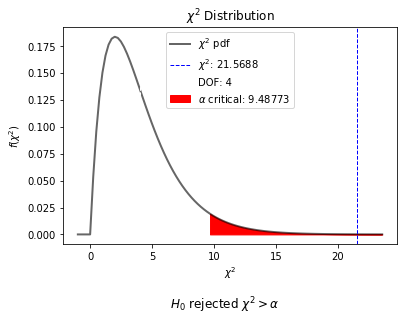

In [17]:
# Example of a Chi-Squared distribution and critical region

from scipy.stats import chi2

def expected_counts(data):
    total = np.sum(data)
    cols = np.sum(data, axis=(0))
    rows = np.sum(data, axis=(1))

    expected_values = []
    
    for row in rows:
        for col in cols:
            expected_values.append(col * row / total)
    return list(zip(list(data.flat), expected_values))

def calc_chi_squared_statistic(data):
    total = 0
    for sample, expected in data:
        total += ((sample - expected)**2) / expected
    
    chi_squared = total
    return chi_squared
    

base_data = np.array(
    [
        [6, 33, 9, 15, 33],
        [14, 32, 26, 9, 29]
    ]
)

base_data = np.array(
    [
         [37, 11, 35],
         [18, 25, 10],
         [20, 24, 20]
    ]
)

data = expected_counts(base_data)

chi_squared_statistic = calc_chi_squared_statistic(data)
c = base_data.shape[0] # no of columns
r = base_data.shape[1] # no of rows
dof = (r - 1) * (c - 1)
alpha = 0.05
# Calculate critical region from alpha (confidence level)
crit = chi2.isf(alpha, df=dof)

x = np.linspace(-1, max(chi_squared_statistic, crit) + 2, 100)
plt.title(r'$\chi^2$ Distribution')
plt.xlabel(r'$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')

plt.plot(x, chi2.pdf(x, dof), 'k', lw=2, alpha=0.6, label='$\chi^2$ pdf')

plt.axvline(
    chi_squared_statistic, label=f'$\\chi^2$: {chi_squared_statistic:g}', 
    color='b', linestyle='dashed', linewidth=1
)
plt.axvline(
    dof, label=f'DOF: {dof}', 
    color='w', linestyle='dashed', linewidth=1
)

fill_x = [e for e in x if e > crit]
plt.fill_between(
    fill_x, [0]*len(fill_x), chi2.pdf(fill_x, dof), 
    color='red', label=f'$\\alpha$ critical: {crit:g}'
)

if chi_squared_statistic > crit:
    text = '$H_0$ rejected $\\chi^2 > \\alpha$'
else:
    text = '$H_0$ not rejected $\\chi^2 < \\alpha$'

plt.figtext(0.5, -0.1, text, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend(loc=0)
plt.show()

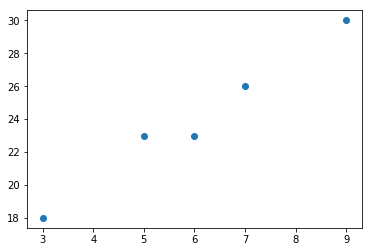

In [18]:

data = [(5, 23), (9, 30), (3, 18), (7,26), (6, 23)]

plt.scatter([ x for x,y in data], [y for x,y in data])
plt.show()

In [19]:
# Confidence Interval calculation
data = [
    235, 374, 309, 499, 253,
    421, 361, 514, 462, 369,
    394, 439, 348, 344, 330,
    261, 374, 302, 466, 535,
    386, 316, 296, 332, 334
]
a = 0.05
sigma = 75
x_bar = mean(data)
print('sample mean:', x_bar)

ratio = sigma / math.sqrt(len(data))
error = round(norm.ppf(1 - (a /2)), 3)
print(error, '*', ratio)
result = ratio * error
LCL = x_bar - result
UCL = x_bar + result

print(LCL, UCL)


sample mean: 370.16
1.96 * 15.0
340.76000000000005 399.56


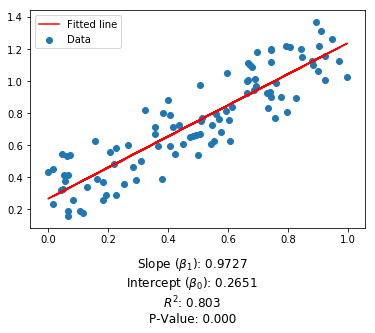

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     399.1
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           2.50e-36
Time:                        12:52:25   Log-Likelihood:                 56.844
No. Observations:                 100   AIC:                            -109.7
Df Residuals:                      98   BIC:                            -104.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2651      0.028      9.614      0.0

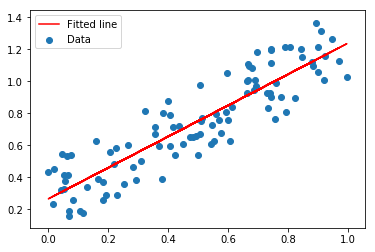

In [20]:
import statsmodels.api as sm
from scipy import stats

x = np.random.rand(100)
y = x + np.random.rand(100)*0.5

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.scatter(x, y, label='Data')
plt.plot(x, intercept + slope * x, 'r', label='Fitted line')
plt.legend()
text = f'Slope ($\\beta_1$): {slope:.4f}\n Intercept ($\\beta_0$): {intercept:.4f}\n $R^2$: {r_value**2:.3f}\n P-Value: {p_value:.3f}'
plt.figtext(0.5, -0.2, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

results = sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

X_plot = np.linspace(0,1,100)
plt.plot(x, results.params[0] + results.params[1] * x, 'r', label='Fitted line')

plt.scatter(x, y, label='Data')
plt.legend()
plt.show()

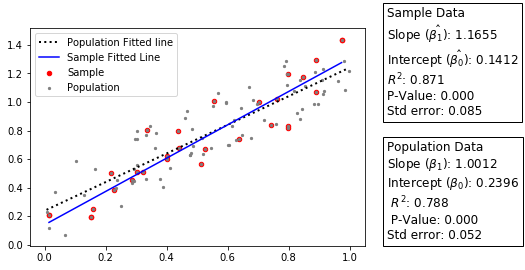

In [80]:
###### import statsmodels.api as sm
from scipy import stats
import random

data_x = np.random.rand(100)
data_y = data_x + np.random.rand(100)*0.5
slope, intercept, r_value, p_value, std_err = stats.linregress(data_x, data_y)

min_x = min(data_x)
max_x = max(data_x)

plt.plot([min_x, max_x], [intercept + slope * x for x in [min_x, max_x]], 'k', linestyle='dotted', linewidth=2, label='Population Fitted line')
text = f'Population Data\nSlope ($\\beta_1$): {slope:.4f}\nIntercept ($\\beta_0$): {intercept:.4f}\n $R^2$: {r_value**2:.3f}\n P-Value: {p_value:.3f}\nStd error: {std_err:.3f}'
plt.figtext(0.95, 0.15, text, wrap=False, horizontalalignment='center', fontsize=12,
           bbox=dict(facecolor='white'), ha='left'
)

sample_size = 30

samples = random.choices(range(len(data_x)), k=sample_size)
x_bar = np.array([data_x[s] for s in samples])
y_bar = np.array([data_y[s] for s in samples])

slope, intercept, r_value, p_value, std_err = stats.linregress(x_bar, y_bar)

min_x = min(x_bar)
max_x = max(x_bar)

plt.scatter(x_bar, y_bar, s=20, color='r', label='Sample')
plt.scatter(data_x, data_y, s=5, color='gray', label='Population')
#plt.plot(x_bar, intercept + slope * x_bar, 'b', label='Sample Fitted Line')
plt.plot([min_x, max_x], [intercept + slope * x for x in [min_x, max_x]], 'b', label='Sample Fitted Line')
plt.legend()
text = (
    f'Sample Data\n'
    f'Slope ($\\hat{{\\beta_1}}$): {slope:.4f}\n'
    f'Intercept ($\\hat{{\\beta_0}}$): {intercept:.4f}\n'
    f'$R^2$: {r_value**2:.3f}\n'
    f'P-Value: {p_value:.3f}\n'
    f'Std error: {std_err:.3f}'
)
        
#plt.figtext(1, .0, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(
    0.95, 0.58, text, wrap=False, horizontalalignment='center', fontsize=12,
    bbox=dict(facecolor='white'), ha='left'

)

#plt.rcParams["figure.figsize"] = 10,10
plt.show()



In [22]:
min([5,3,2,6,3,1])

1